In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d anshtanwar/pets-facial-expression-dataset

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 86% 33.0M/38.6M [00:00<00:00, 63.4MB/s]
100% 38.6M/38.6M [00:00<00:00, 63.7MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/pets-facial-expression-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications import MobileNetV2

In [6]:
conv_base=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

9406464/9406464 [==============================] - 0s 0us/step


In [7]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [8]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 100)               6272100   
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 40)                2840      
                                                                 
 dense_3 (Dense)             (None, 4)                 164       
                                                        

In [11]:
conv_base.trainable=False

In [12]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [13]:
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/Master Folder/train',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator=test_datagen.flow_from_directory(
    '/content/Master Folder/test',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical')

Found 748 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


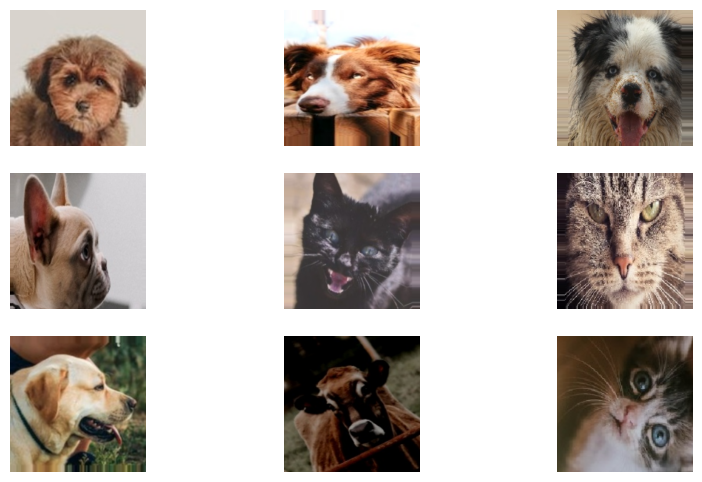

In [14]:
import matplotlib.pyplot as plt
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping])

<ipython-input-17-448e6440a197>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/25
24/24 [==============================] - 18s 432ms/step - loss: 2.7428 - accuracy: 0.4599 - val_loss: 1.7731 - val_accuracy: 0.5000
Epoch 2/25
24/24 [==============================] - 10s 422ms/step - loss: 0.8923 - accuracy: 0.7126 - val_loss: 0.7586 - val_accuracy: 0.7698
Epoch 3/25
24/24 [==============================] - 8s 352ms/step - loss: 0.5792 - accuracy: 0.8289 - val_loss: 1.0127 - val_accuracy: 0.7143
Epoch 4/25
24/24 [==============================] - 9s 374ms/step - loss: 0.4005 - accuracy: 0.8837 - val_loss: 0.4367 - val_accuracy: 0.8492
Epoch 5/25
24/24 [==============================] - 10s 398ms/step - loss: 0.2356 - accuracy: 0.9211 - val_loss: 0.4654 - val_accuracy: 0.8571
Epoch 6/25
24/24 [==============================] - 9s 394ms/step - loss: 0.1828 - accuracy: 0.9452 - val_loss: 0.6000 - val_accuracy: 0.8413
Epoch 7/25
24/24 [==============================] - 8s 352ms/step - loss: 0.0939 - accuracy: 0.9652 - val_loss: 0.3891 - val_accuracy: 0.8929
Epo

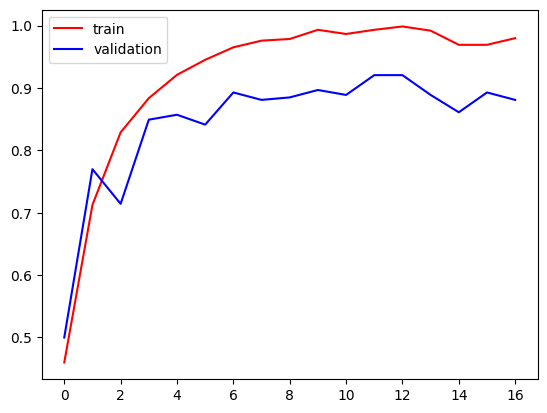

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

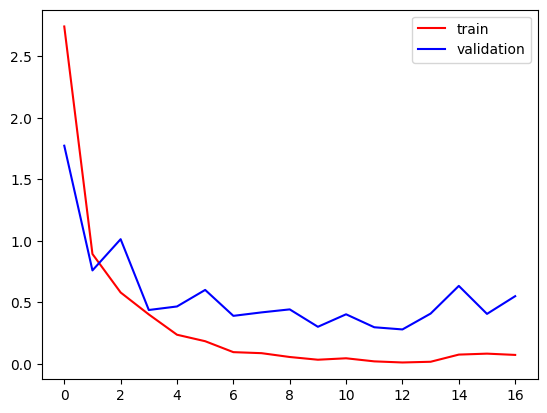

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.models import load_model
model.save('pet_emotion.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
loss, accuracy = model.evaluate(validation_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

8/8 [==============================] - 0s 52ms/step - loss: 0.2963 - accuracy: 0.9206
Test Loss: 0.29632261395454407
Test Accuracy: 0.920634925365448


In [24]:
 validation_generator.class_indices

{'Angry': 0, 'Happy': 1, 'Relaxed': 2, 'Sad': 3}

In [25]:
from keras.preprocessing import image
import numpy as np
model = load_model('pet_emotion.h5')

file_path = "/content/Master Folder/valid/Sad/020.jpg"

img = image.load_img(file_path, target_size=(224,224))
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
print(preds)

1/1 [==============================] - 1s 1s/step
[3]


In [39]:
file_path = "/content/Master Folder/valid/happy/042.jpg"

img = image.load_img(file_path, target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds == 0:
    print("Angry")
elif preds == 1:
    print("Happy")
elif preds == 2:
    print("Relaxed")
else:
    print("Sad")

1/1 [==============================] - 0s 36ms/step
Happy
